# Case Study: Factors Influencing Car Selling Prices <a id='intro'></a>

A car sales company called `Crankshaft List` wants to know what factors affect the selling price of a car. Hundreds of free vehicle advertisements are displayed on the company's website every day. We need to study datasets over the last few years and determine the factors that influence the price of a vehicle.

Factor analysis The selling price of a car is influenced by several factors, some of which are `model_year`, `model`, `condition`, `cylinders`, `fuel`, `odometer`, `transmission`, `type`, `paint_color`, ` is_4wd`. Is it true that the factors mentioned affect the selling price of the car?

Some of the hypotheses proposed to find out the 'Car Sales Price Factor' include:
- Is it true that the average selling price of cars owned by the `Crankshaft List` is around `USD 15000`?
- Is it true that the average age of cars sold on the `Crankshaft List` is around `2 years old`?
- Is it true that the average mileage of cars sold by `Crankshaft List` is around `200000 Miles`?
- Is it true that the average ad run time is `30 days` until the car is sold?
- Is it true that `truck` and `pickup` cars have a lot of advertisements?
- Is it true that the correlation between `'price'` and age `'age'` has a strong negative correlation?
- Is it true that `sedan` cars with `automatic` transmission types have a higher selling price compared to other types of transmissions?
- Is it true that `suv` cars with `manual` transmission types have a higher selling price compared to other types of transmissions?
- Is it true that a `sedan` car with a `red` color type has a higher selling price compared to other colors?
- Is it true that `suv` cars with `orange` color type have a higher selling price compared to other colors?

# Content <a id='back'></a>

* [Intro](#intro)
* [Step 1. Pre-processing](#cont_1)
     * [1.1 Load Data](#cont_2)
     * [1.2 Exploring Preliminary Data](#cont_3)
     * [1.3 Conclusion and Next Steps](#cont_4)
* [Step 2. Overcoming Missing Values](#cont_5)
     * [2.1 Overcome Column `'model_year'`](#cont_6)
     * [2.2 Overcome Column `'cylinders'`](#cont_7)
     * [2.3 Overcome Column `'odometer'`](#cont_8)
     * [2.4 Overcome Column `'is_4wd'`](#cont_9)
     * [2.5 Overcome Column `'paint_color'`](#cont_10)
     * [2.6 Checking for Duplicate Data](#cont_11)
* [Step 3. Fixed Data Type](#cont_12)
* [Step 4. Improving Data Quality](#cont_13)
     * [4.1 Create Columns Based on 'datetime'](#cont_14)
     * [4.2 Create Car Age Column](#cont_15)
     * [4.4 Create Column Average Vehicle Mileage per Year](#cont_16)
     * [4.5 Change Column Condition to Ordinality](#cont_17)
* [Step 5. Checking Cleaned Data](#cont_18)
*[Step 6. Learning Core Parameters](#cont_19)
     *[6.1 Boxplot Core Parameters](#cont_20)
     *[6.2 Core Parameter Histogram](#cont_21)
     * [6.3 Correlation Table](#cont_22)
     * [6.4 Correlation Graph](#cont_23)
     * [6.5 Hexbin Graph](#cont_24)
* [Step 7. Learning and Dealing with Outliers](#cont_25)
* [Step 8. Learning Core Parameters Without Outliers](#cont_26)
* [Step 9. Ad Expiration](#cont_27)
     * [9.1 Average Ad Run Time](#cont_28)
     * [9.2 Looking for Shortest Showtime](#cont_29)
     * [9.3 Looking for Longest Showtime](#cont_30)
* [Stage 10. Average Price of Each Type of Vehicle](#cont_31)
* [Phase 11. Price Factor](#cont_32)
* [Stage 12. General conclusion](#cont_33)

## Pre-processing <a id= 'cont_1' ></a>

In the analysis to find `Factors Affecting the Price of a Car`, several additional libraries are needed including `'Pandas'` to process data, `'Matplotlib'` and `seaborn` to display graphs of processed data and `'Numpy'` to check for an empty value in a cell.

In [156]:
# load all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# seaborn theme set
sns.set_theme(palette='bright')

### Load Data <a id= 'cont_2' ></a>

Next we will load the data coming from the `CSV File` which is `'vehicles_us.csv'`.

In [157]:
# load the csv file into a DataFrame
vehicle_data = pd.read_csv('vehicles_us.csv')

### Exploring Preliminary Data <a id= 'cont_3' ></a>

*Dataset* contains the following fields:

- `price` — the price of a car
- `model_year` — the model year the car was made
- `model` — car model
- `condition` — car condition (new, used, etc.)
- `cylinders` — the number of cylinders in the car
- `fuel` — the type of car fuel
- `odometer` — the distance traveled by the car when the ad is shown
- `transmission` — the type of car transmission
- `paint_color` — car color
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was shown
- `days_listed` — the number of days the ad was served until it was removed

In [158]:
# displays general information/summary about the DataFrame
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Based on the general information above the datasets consist of `13 Columns` and `51525 Rows`. Datasets are composed of several data types including `float64`, `int64` and `object`.

In [159]:
# the top data sample
vehicle_data.head() 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [160]:
# the bottom data sample
vehicle_data.tail() 

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


In [161]:
# displays the dataset type
vehicle_data.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

There are several wrong data types such as the `date` column and `model_year` column which need to be converted to another data format type.

In [162]:
# displays basic statistical information on the dataset
vehicle_data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


The table above shows that the distribution of data is not good, such as the 'price' column and the 'odometer' column which have a high standard deviation. This may be due to outliers in the dataset that we need to fix next.

In [163]:
# displays the number of missing values in each dataset
vehicle_data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

There are several `Missing Values`, namely in the `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd` columns which we will try to fix based on the data we have.

### Conclusion and Next Steps <a id= 'cont_4' ></a>

The dataset can be displayed and retrieved some `normal` information and some `abnormal` information, so further analysis is needed.

Some normal information includes:
- the `model` dataset already has quite clear information in the form of the car model
- the `fuel` dataset already has quite clear information in the form of the type of car fuel
- the `type` dataset already has quite clear information in the form of the type of car
- the `transmission` dataset already has quite clear information in the form of the type of car transmission
- the `days_listed` dataset already has quite clear information in the form of the length of time the ad was posted

Some of the information that is not normal includes:
- the `price` and `odometer` datasets have a high standard deviation which will affect the car price factor
- datasets `model_year`, `cylinders`, and `date_posted` use the wrong data type
- datasets `model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd` have missing values
- the `condition` dataset is still categorical, which will make it difficult for us to analyze its effect on `price`.

Some steps to correct abnormal information include:
- Check whether there are outliers in the `price` and `odometer` dataset, if there are many outliers then it is necessary to eliminate these outliers
- change data type `model_year`, `cylinders` to data type `integer`
- changed the `date_posted` data type to the `datetime` data type
- create ordinality in the `condition` dataset by converting it to numeric form
- fixed missing values in datasets `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`

## Overcoming Missing Values <a id= 'cont_5' ></a>

Next we will examine the 'Missing Values' and what strategies are used to fill in the missing values in the dataset.

### Overcome Column `'model_year'` <a id= 'cont_6' ></a>

In [164]:
# fix dataset 'model_year'
# shows missing sample 'model_year' data
vehicle_data[vehicle_data['model_year'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


From the table above, there is a pattern that `'model_year'` depends on the `'model'` and `'condition'` of the car. So we will fill in the missing `'model_year'` based on the existing `'model_year'` values from `'model'` and `'condition'`.

In [165]:
# fix column 'model_year' by column 'model' and column 'condition'

# create a 'model_year' dictionary that has values based on 'model' and 'condition'
dict_model_condition_year = vehicle_data.groupby(['model','condition'])['model_year'].median().to_dict()

# create a function to fill in missing values using the dictionary that was created
def repair_model_year(data):
    if np.isnan(data['model_year']):
        return dict_model_condition_year.get((data['model'],data['condition']))
    return data['model_year']

# apply the function to the dataframe
vehicle_data['model_year'] = vehicle_data.apply(repair_model_year,axis=1)

# missing value checking
vehicle_data[vehicle_data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
10444,9600,NaN,chevrolet cruze,new,4.0,gas,19000.0,automatic,sedan,white,NaN,2018-07-30,33
18125,15000,NaN,cadillac escalade,salvage,8.0,gas,108000.0,automatic,SUV,black,1.0,2018-06-03,49
20368,7000,NaN,volkswagen jetta,new,4.0,diesel,171000.0,automatic,sedan,white,NaN,2019-03-28,107
21758,23000,NaN,ford escape,new,4.0,gas,12000.0,automatic,SUV,NaN,1.0,2019-02-13,23
27192,1200,NaN,toyota rav4,salvage,4.0,gas,NaN,automatic,SUV,green,1.0,2018-10-19,21
47905,13900,NaN,jeep wrangler,new,NaN,gas,149000.0,automatic,SUV,silver,1.0,2019-04-10,35


It can be seen that there are still missing values in the `model_year` column. Let's combine with other columns to fill in the missing values. It can be seen that there is a similarity between the `model_year` column and the `model` and `type` columns. Let's use these fields to fill in the missing values.

In [166]:
# fixed column 'model_year' by 'model' and 'type'

# create a 'model_year' dictionary that has values based on 'model' and 'type'
dict_model_type_year = vehicle_data.groupby(['model','type'])['model_year'].median().to_dict()

# create a function to fill in missing values using the dictionary that was created
def repair_model_year(data):
    if np.isnan(data['model_year']):
        return dict_model_type_year.get((data['model'],data['type']))
    return data['model_year']

# apply the function to the dataframe
vehicle_data['model_year'] = vehicle_data.apply(repair_model_year,axis=1)

# missing value checking
vehicle_data['model_year'].isna().sum()

0

We have now filled in all the missing values in the `model_year` column. Let's fix the other columns.

### Overcome Column `cylinders` <a id= 'cont_7' ></a>

In [167]:
# fix 'cylinders' dataset
# display sample data 'cylinders'
vehicle_data[vehicle_data['cylinders'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17


From the above table there is a pattern that `'cylinders'` depends on the ``model'` of the car. So we will fill in the missing `'cylinders'` based on the existing `'cylinders'` values from `'model'`.

In [168]:
# fixed column 'cylinders' by 'model'

# create a 'cylinders' dictionary that has values based on 'model'
dict_model_cyl = vehicle_data.groupby('model')['cylinders'].mean().to_dict()

# create a function to fill in missing values using the dictionary that was created
def repair_cylinders(data):
    if np.isnan(data['cylinders']):
        return dict_model_cyl.get(data['model'])
    return data['cylinders']

# apply the function to the dataframe
vehicle_data['cylinders'] = vehicle_data.apply(repair_cylinders,axis=1)

# missing value checking
vehicle_data['cylinders'].isna().sum()

0

We have now filled in all the missing values in the `cylinders` column. Let's fix the other columns.

### Overcome Column `odometer` <a id= 'cont_8' ></a>

In [169]:
# fix 'odometer' dataset
# display sample 'odometer' data
vehicle_data[vehicle_data['odometer'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43


From the table above, there is a pattern that the `'odometer'` depends on the `'model'` and `'condition'` of the car. So we will fill in the missing `'odometer'` based on the existing `'odometer'` values from `'model'` and `'condition'`.

In [170]:
# fixed column 'odometer' by 'model' and 'condition'

# create an 'odometer' dictionary that has values based on 'model' and 'condition'
dict_model_condition_odo = vehicle_data.groupby(['model','condition'])['odometer'].median().to_dict()

# create a function to fill in missing values using the dictionary that was created
def repair_cylinders(data):
    if np.isnan(data['odometer']):
        return dict_model_condition_odo.get((data['model'],data['condition']))
    return data['odometer']

# apply the function to the dataframe
vehicle_data['odometer'] = vehicle_data.apply(repair_cylinders,axis=1)

# missing value checking
vehicle_data[vehicle_data['odometer'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-08-23,70
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-04-12,31
4149,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-10-12,28


It can be seen that there are still missing values in the `odometer` column. Let's combine with other columns to fill in the missing values. It can be seen that there is a similarity between the `odometer` column and the `model` and `type` columns. Let's use these fields to fill in the missing values.

In [171]:
# fixed column 'odometer' by 'model' and 'type'

# create an 'odometer' dictionary that has values based on 'model' and 'type'
dict_model_type_odo = vehicle_data.groupby(['model','type'])['odometer'].median().to_dict()

# create a function to fill in missing values using the dictionary that was created
def repair_cylinders(data):
    if np.isnan(data['odometer']):
        return dict_model_type_odo.get((data['model'],data['type']))
    return data['odometer']

# apply the function to the dataframe
vehicle_data['odometer'] = vehicle_data.apply(repair_cylinders,axis=1)


# missing value checking
vehicle_data[vehicle_data['odometer'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-08-23,70
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-04-12,31
4149,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-10-12,28


It can be seen that there are still missing values in the `odometer` column. Let's combine with other columns to fill in the missing values. It can be seen that there is a similarity between the `odometer` column and the `model_year` column. Let's use these fields to fill in the missing values.

In [172]:
# fixed column 'odometer' by 'model_year'

# create an 'odometer' dictionary that has values based on 'model_year'
dict_model_year_odo = vehicle_data.groupby(['model_year'])['odometer'].median().to_dict()

# create a function to fill in missing values using the dictionary that was created
def repair_cylinders(data):
    if np.isnan(data['odometer']):
        return dict_model_year_odo.get(data['model_year'])
    return data['odometer']

# apply the function to the dataframe
vehicle_data['odometer'] = vehicle_data.apply(repair_cylinders,axis=1)

# missing value checking
vehicle_data['odometer'].isna().sum()

0

We have now filled in all the missing values in the `odometer` column. Let's fix the other columns.

### Overcome Column `is_4wd` <a id= 'cont_9' ></a>

In [173]:
# fix dataset 'is_4wd'
# display 'is_4wd' information
vehicle_data['is_4wd'].value_counts(dropna=False)

is_4wd
NaN    25953
1.0    25572
Name: count, dtype: int64

From the information above we can say that in the `is_4wd` column there is only a value of 1 which indicates the use of `4WD Drive`, but for `Not Using 4WD` it does not appear. We can conclude that the missing value is a value of 0 which means 'Not Using 4WD'.

In [174]:
# change the NaN value to '0' in column 'is_4wd'
vehicle_data['is_4wd'].fillna(0,inplace=True)
vehicle_data['is_4wd'].value_counts(dropna=False)

is_4wd
0.0    25953
1.0    25572
Name: count, dtype: int64

Now the `is_4wd` column has no missing values.

### Overcome Column `paint_color` <a id= 'cont_10' ></a>

In [175]:
# checking for missing values in the 'paint color' column
vehicle_data['paint_color'].value_counts(dropna=False)

paint_color
white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

From the above information, it is difficult to determine the value of `color` which is missing in the `paint_color` column, because `color` does not depend on anything (does not have a special pattern). So next we let the missing values remain blank.

In [176]:
# check for missing values
vehicle_data.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

From the information above, it seems that the missing values are filled in except for the `paint_color` column. Next let's change the data type.

### Check for Duplicate Data <a id= 'cont_11' ></a>

In [177]:
# check for duplicates
vehicle_data.duplicated().sum()

0

`No duplicates` in the data we have.

## Fixed Data Type <a id= 'cont_12' ></a>

Next we will change some data types as previously concluded. Let's change some data types in the following columns:

In [178]:
# change data type 'model_year' to integer
vehicle_data['model_year'] = vehicle_data['model_year'].astype('int')

# change data type 'cylinders' to integer
vehicle_data['cylinders'] = vehicle_data['cylinders'].astype('int')

# change data type 'odometer' to integer
vehicle_data['odometer'] = vehicle_data['odometer'].astype('int')

# change data type 'is_4wd' to integer
vehicle_data['is_4wd'] = vehicle_data['is_4wd'].astype('int')

# change data type 'date_posted' to datetime
vehicle_data['date_posted'] = pd.to_datetime(vehicle_data['date_posted'],format='%Y-%m-%d')

vehicle_data.dtypes

price                    int64
model_year               int32
model                   object
condition               object
cylinders                int32
fuel                    object
odometer                 int32
transmission            object
type                    object
paint_color             object
is_4wd                   int32
date_posted     datetime64[ns]
days_listed              int64
dtype: object

All data types are as expected. Let's continue to improve data quality.

## Improving Data Quality <a id= 'cont_13' ></a>

Next, we will improve the quality of the data to make it easier for us to do the analysis. As for improving the quality of the data, such as adding a column to separate `day, month, year, date`. In addition, we will add columns for the `age` of the car, `average mileage per year` and make ordinality in the `condition` column. Let's create a column to separate `datetime`.

### Create Column Based on datetime <a id= 'cont_14' ></a>

In [179]:
# add the time and date values at the time the ad was shown

# add column 'dayofweek'
vehicle_data['dayofweek'] = vehicle_data['date_posted'].dt.dayofweek

# add column 'year'
vehicle_data['year'] = vehicle_data['date_posted'].dt.year

# add column 'month'
vehicle_data['month'] = vehicle_data['date_posted'].dt.month

# add column 'day'
vehicle_data['day'] = vehicle_data['date_posted'].dt.day

# displays sample data
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek,year,month,day
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,5,2018,6,23
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10,19
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2,7
3,1500,2003,ford f-150,fair,8,gas,191850,automatic,pickup,NaN,0,2019-03-22,9,4,2019,3,22
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4,2


We can see some additional columns namely `day`, `year`, `month` and `dayofweek` which are fractions of the `date_posted` column. Next let's create a column for the `age` of the car.

### Create a Car Age Column <a id= 'cont_15' ></a>

In [180]:
# added the age of the vehicle when the ad is shown
vehicle_data['age'] = vehicle_data['date_posted'].dt.year - vehicle_data['model_year'] 

# displays sample data
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek,year,month,day,age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,5,2018,6,23,7
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10,19,10
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2,7,6
3,1500,2003,ford f-150,fair,8,gas,191850,automatic,pickup,NaN,0,2019-03-22,9,4,2019,3,22,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4,2,2


Next, we will create the column `avg_odo` which is the `average mileage per year` of the car.

### Create a Column for Average Vehicle Mileage per Year <a id= 'cont_16' ></a>

In [181]:
# Added the average vehicle mileage per year

# to avoid zero division, change the zero row in the 'age' column as it has the potential to become inf
# change the value '0' to '1' in the dataset 'age' for the first year
vehicle_data['age'] = vehicle_data['age'].replace(0,1)

# calculate the average distance of the vehicle
vehicle_data['avg_odo'] = vehicle_data['odometer']/vehicle_data['age']

# change the data type to integer
vehicle_data['avg_odo'] = vehicle_data['avg_odo'].astype('int')

# displays sample data
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek,year,month,day,age,avg_odo
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,5,2018,6,23,7,20714
1,25500,2008,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10,19,10,8870
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2,7,6,18333
3,1500,2003,ford f-150,fair,8,gas,191850,automatic,pickup,NaN,0,2019-03-22,9,4,2019,3,22,16,11990
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4,2,2,40451


Next, we will change the `condition` column to ordinality based on the value category of the value.

### Changing the Condition Column to Ordinality <a id= 'cont_17' ></a>

In [182]:
# change categorical to rating value to facilitate analysis

# replaces the categorical 'salvage' with a value of 0
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'salvage', 0)

# replaces the categorical 'fair' with a value of 1
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'fair', 1)

# replaces the categorical 'good' with a value of 2
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'good', 2)

# replaces the categorical 'excellent' with a value of 3
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'excellent', 3)

# changes the 'like new' category to a value of 4
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'like new', 4)

# replaces the categorical 'new' with a value of 5
vehicle_data['condition'] = vehicle_data['condition'].where(vehicle_data['condition'] != 'new', 5)

# change the data type to integer
vehicle_data['condition'] = vehicle_data['condition'].astype('int')

# checking the `condition` column
vehicle_data['condition'].value_counts()

condition
3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: count, dtype: int64

## Checking Clean Data <a id= 'cont_18' ></a>

After making some modifications to the data, we will then see the data that we have cleaned as follows:

In [183]:
# displays general information/summary about the DataFrame
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int32         
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  dayofweek     51525 non-null  int32         
 14  year          51525 non-null  int32         
 15  month         51525 non-null  int32 

In [184]:
# displays sample data
vehicle_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,dayofweek,year,month,day,age,avg_odo
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,NaN,1,2018-06-23,19,5,2018,6,23,7,20714
1,25500,2008,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,2018,10,19,10,8870
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2019,2,7,6,18333
3,1500,2003,ford f-150,1,8,gas,191850,automatic,pickup,NaN,0,2019-03-22,9,4,2019,3,22,16,11990
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,2019,4,2,2,40451


We can see that the number of columns has increased to `19 columns` and the display of the sample data is as expected.

## Learn Core Parameters <a id= 'cont_19' ></a>

Next we will study Core Parameters, where Outliers affect the shape of the data. Some of the parameters we will study.

The parameters are as follows:
- Price (USD)
- Age of the vehicle when the ad was shown (Year)
- Mileage (Miles)
- Number of cylinders (Unit)
- Condition

The first stage we will learn is to use a `boxplot` for the above parameters as follows:

### Core Parameters Boxplot <a id= 'cont_20' ></a>

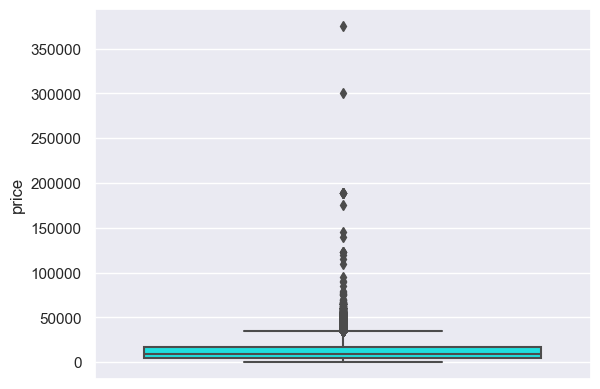

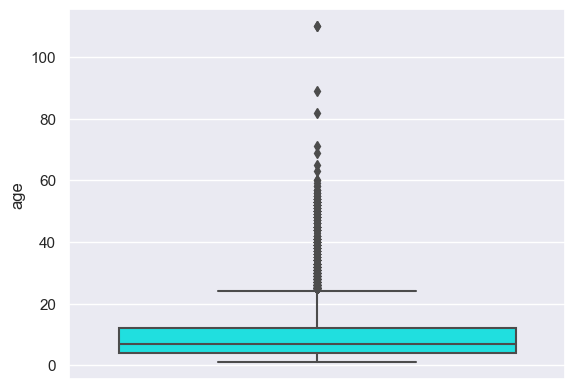

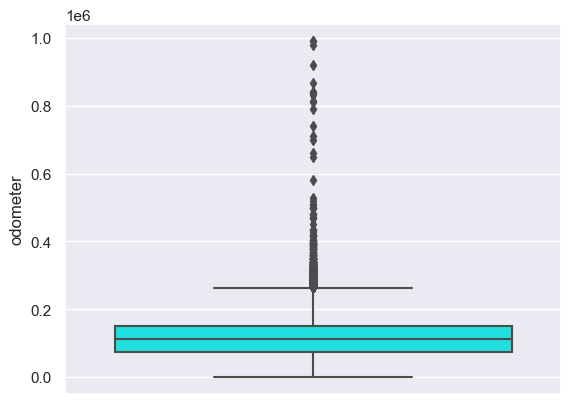

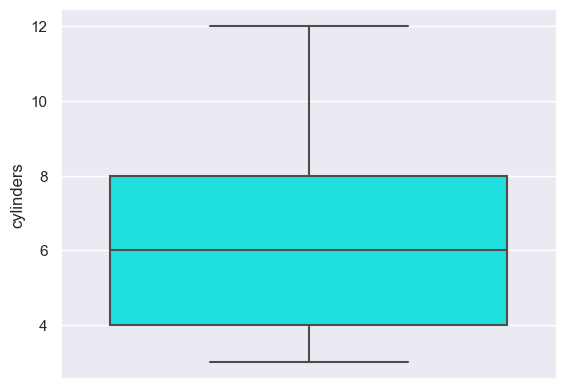

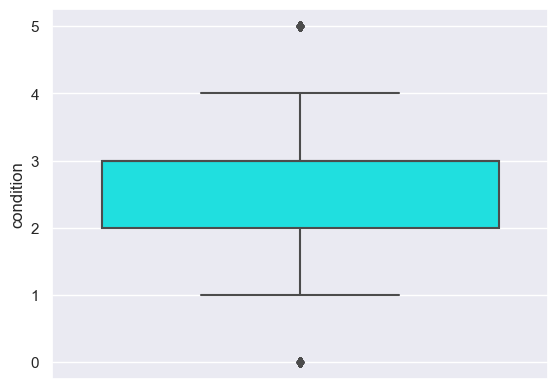

In [185]:
# outliers analysis on dataframe using boxplot
numeric_columns = ['price','age','odometer','cylinders','condition']
for column in numeric_columns:
    sns.boxplot(data=vehicle_data,y=column,color='cyan')
    plt.show()

It is expected that some of the columns have outliers such as the `price`, `age`, `odometer` and `condition` columns. But the `cylinders` column doesn't seem to have any outliers.

The second stage that we will do is check using the `histogram` using the previous parameters.

### Core Parameters Histogram <a id= 'cont_21' ></a>

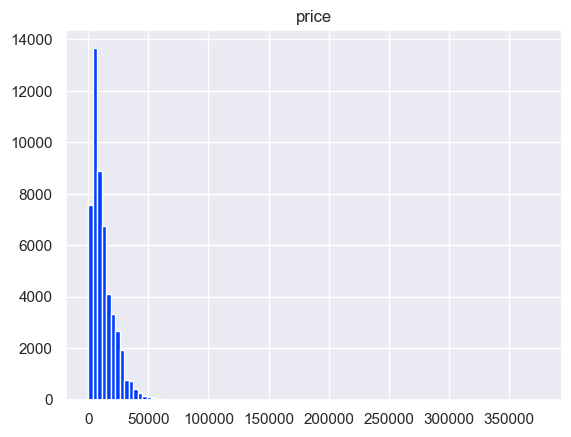

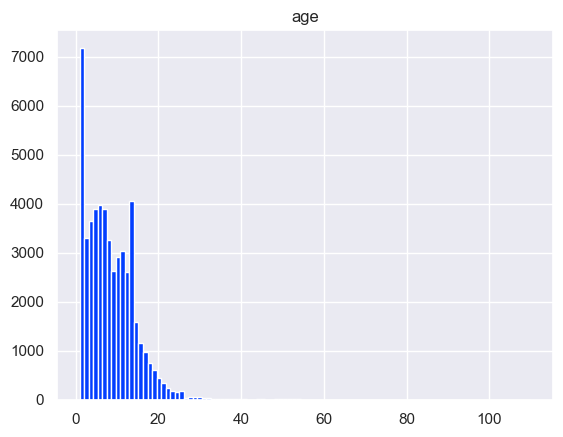

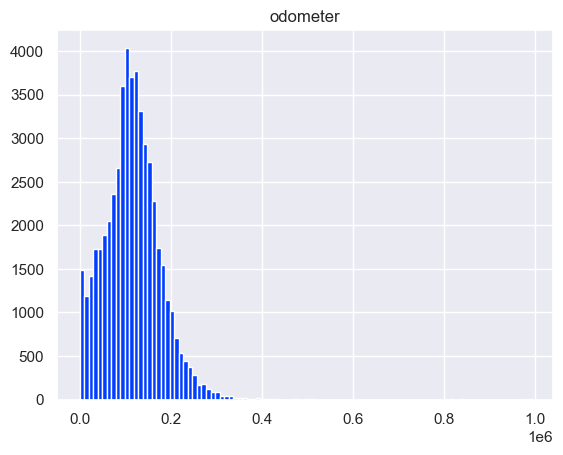

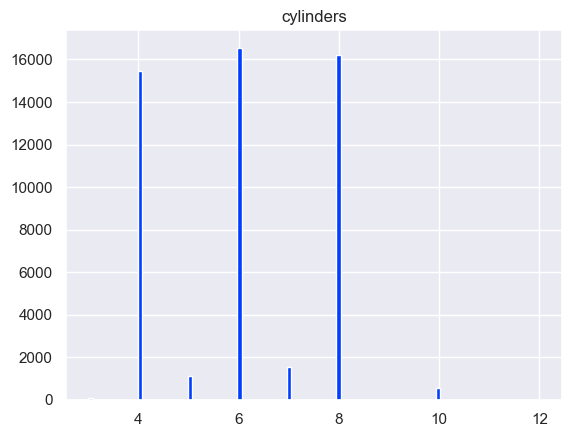

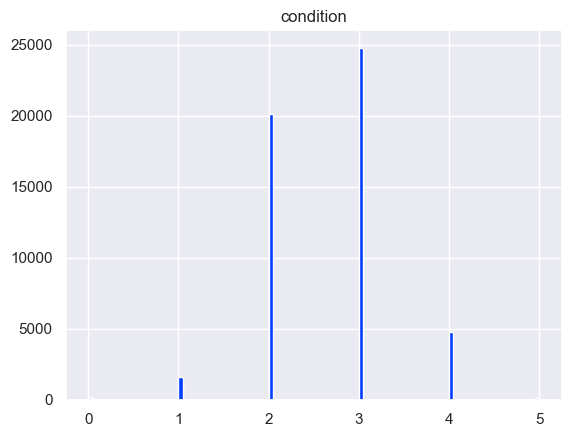

In [186]:
# distribution of dataframes using histograms
for column in numeric_columns:
    vehicle_data[[column]].hist(bins=100)
    plt.show()

From some of the 'histogram' graphs above, it seems that we have difficulty reading them because of outliers. Let's modify the graph to get a clearer picture.

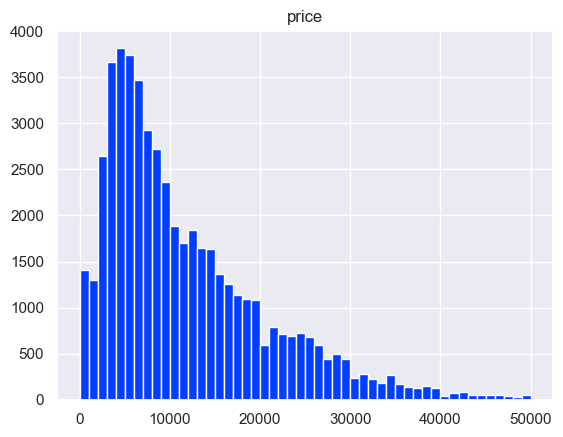

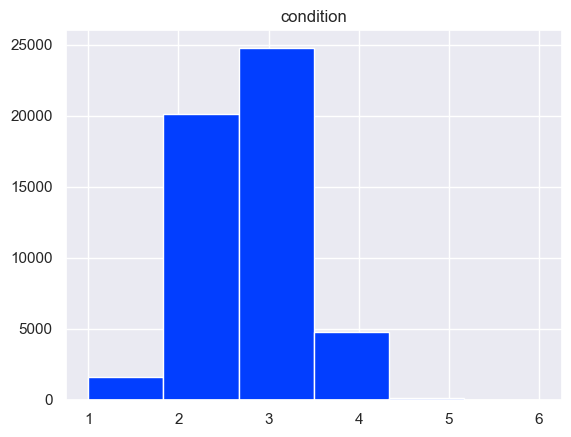

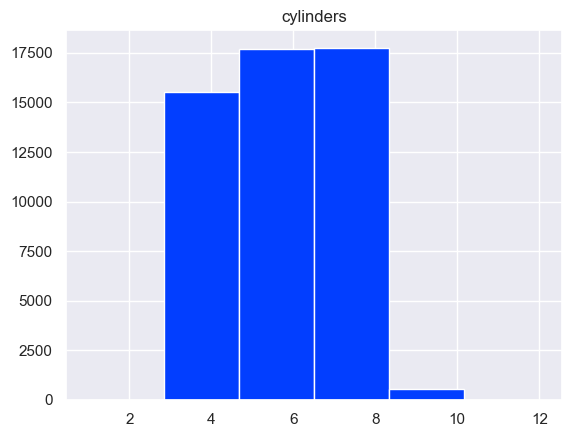

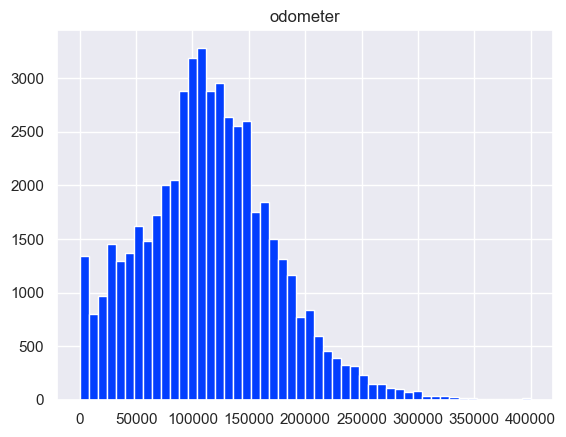

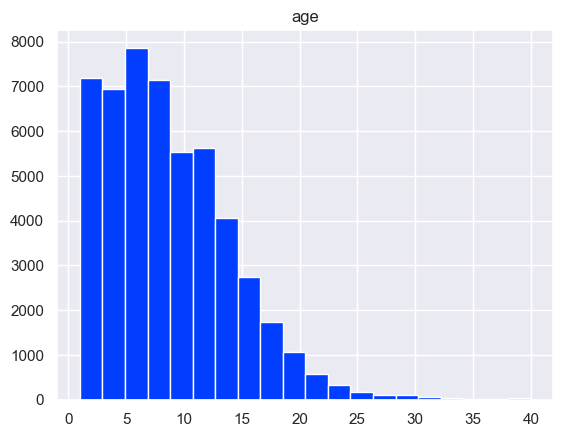

In [187]:
# fixed histogram scaling to make chart reading easier
vehicle_data[['price']].hist(bins=50,range=(0,50000))
vehicle_data[['condition']].hist(bins=6,range=(1,6))
vehicle_data[['cylinders']].hist(bins=6,range=(1,12))
vehicle_data[['odometer']].hist(bins=50,range=(0,400000))
vehicle_data[['age']].hist(bins=20,range=(1,40))

# displays charts
plt.show()

From the `price` column we can see that the data is distributed in the price range of `USD 4000` to `USD 5000`. In the `condition` column the data is distributed in `condition 3 - excellent`, in the `cylinders` column the data is concentrated in `number of cylinders 6 to 8`. In the `odometer` column the data is distributed in the range of `100000 miles`. Finally, in the 'age' column, the data is concentrated on '5 to 7 year olds'.

The third stage, let's check the correlation of the dataset based on the parameters above.

### Correlation Table <a id= 'cont_22' ></a>

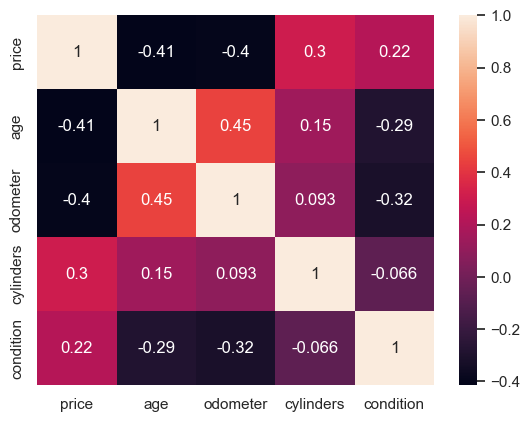

In [188]:
# check the correlation between datasets numerically
corr = vehicle_data[numeric_columns].corr()
sns.heatmap(corr,annot=True)

# displays charts
plt.show()

We can see a less strong correlation between the `price` column and several other columns. This is because there are still outliers so that the dataset does not have a good correlation and we cannot determine the factors that influence car prices.

The fourth stage, let's check graphically the correlation of our data.

### Correlation Chart <a id= 'cont_23' ></a>

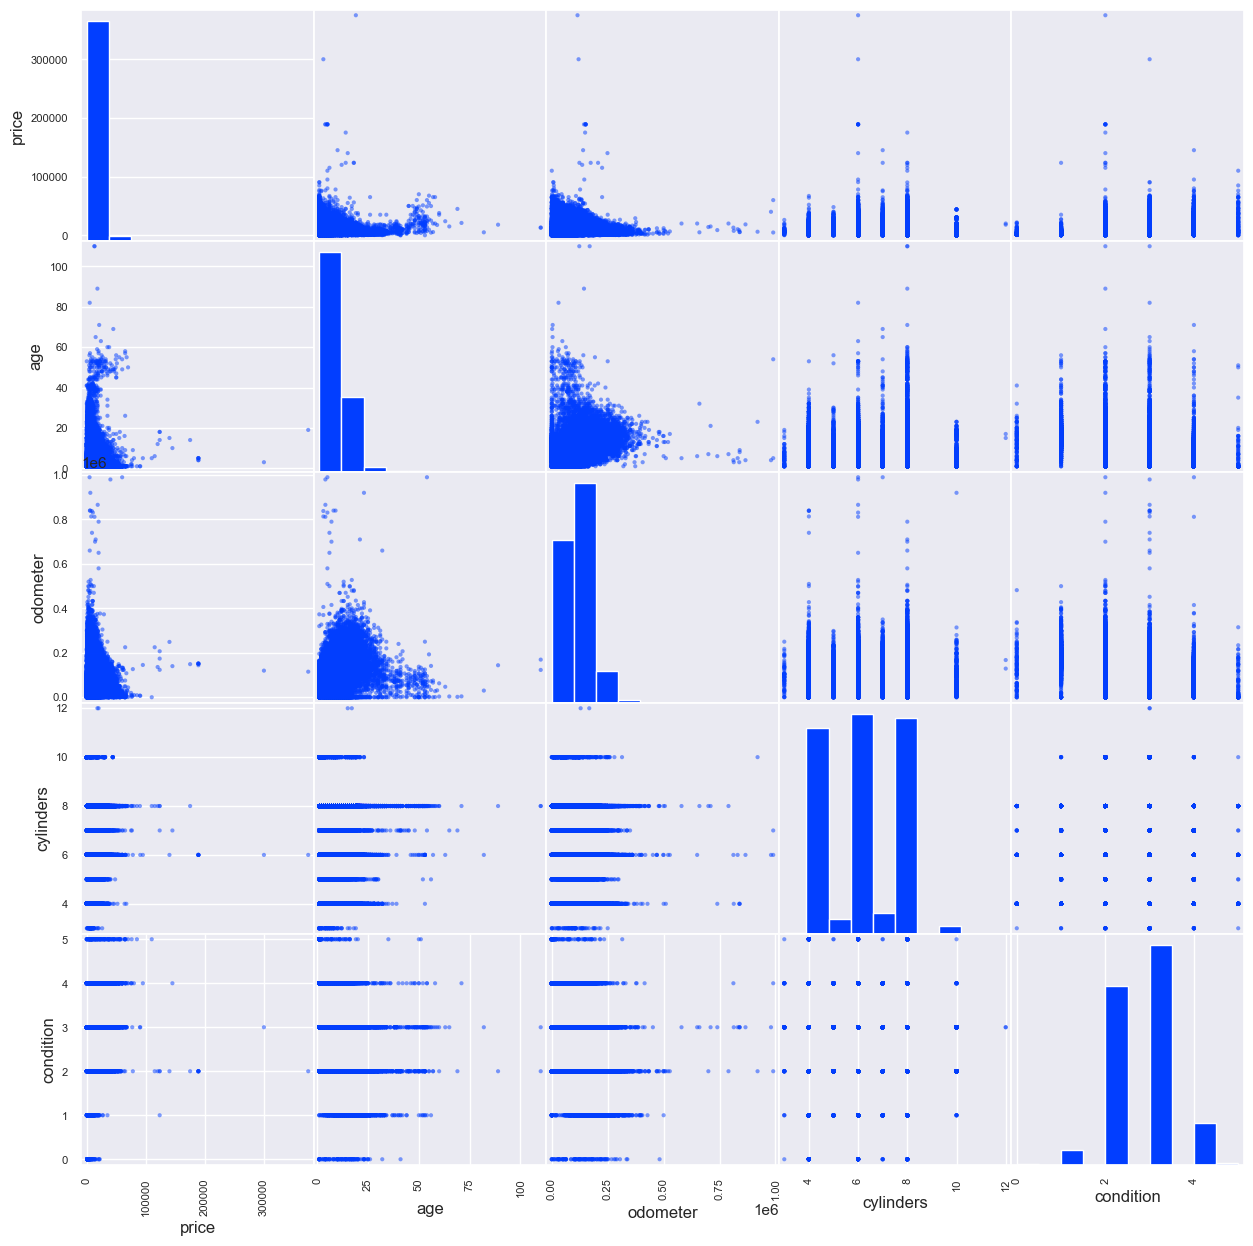

In [189]:
# checking the correlation between datasets graphically
pd.plotting.scatter_matrix(vehicle_data[numeric_columns],figsize=(15,15))
plt.show()

We can conclude that there is still a lot of scattered data which causes a lack of strong relationships.

The fifth stage, let's narrow the scope. Let's plot the `price` against the other columns using the `hexbin` graph.

### Hexbin chart <a id= 'cont_24' ></a>

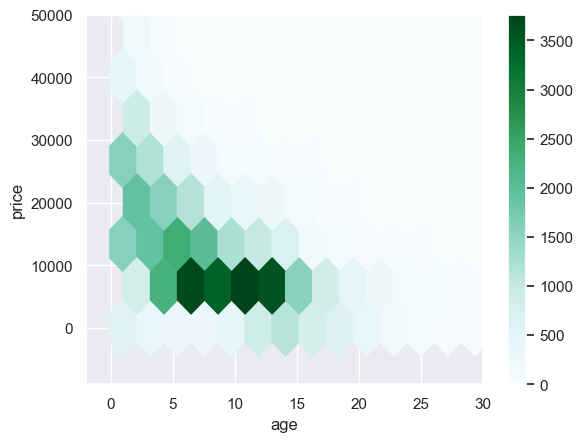

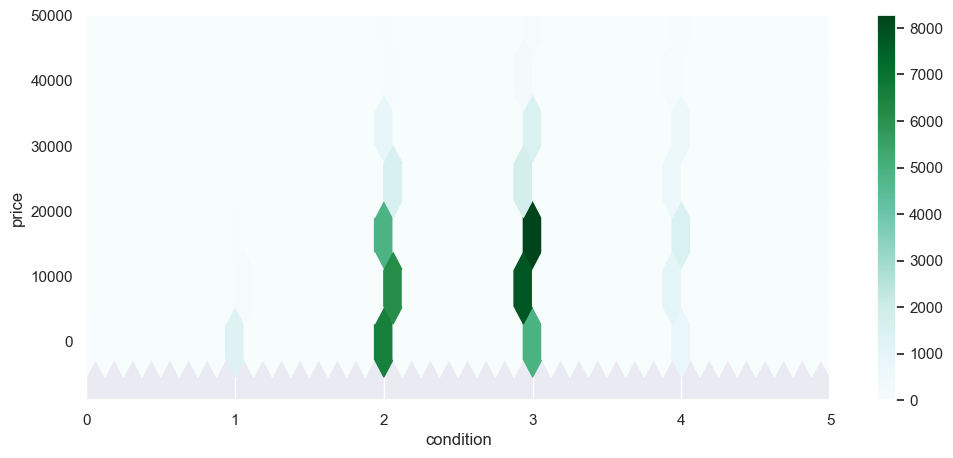

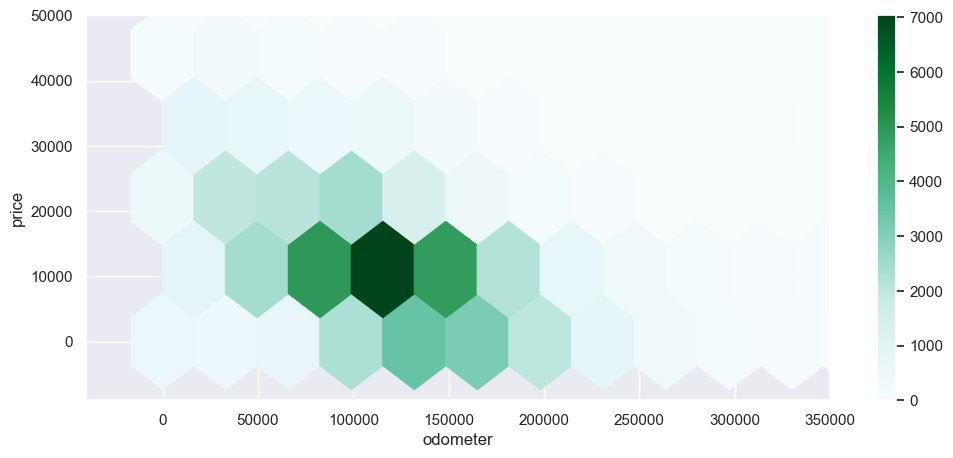

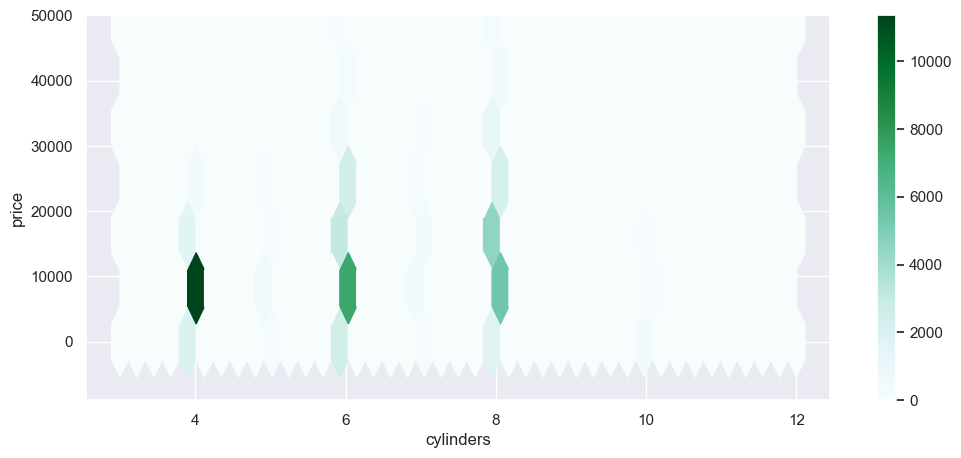

In [190]:
# scatter plot analysis of vehicle prices
vehicle_data.plot(kind='hexbin',gridsize= 50,x='age',y='price',xlim=(-2,30),ylim=(-9000,50000))
vehicle_data.plot(kind='hexbin',gridsize= 40,x='condition',y='price',xlim=(0,5),ylim=(-9000,50000),figsize=(12,5))
vehicle_data.plot(kind='hexbin',gridsize= 30,x='odometer',y='price',xlim=(-40000,350000),ylim=(-9000,50000),figsize=(12,5))
vehicle_data.plot(kind='hexbin',gridsize= 40,x='cylinders',y='price',ylim=(-9000,50000),figsize=(12,5))

# displays charts
plt.show()

We can summarize as follows:
- The relationship between `price` and `age` ranges from `5 to 12 years old` with the amount ranging from `3500` to the price ranging from `USD 8000`
- The relationship between `price` and `condition` ranges from `3` conditions with amounts ranging from `8000` to prices ranging from `USD 20000`
- The relationship between `price` and `odometer` is in the odometer range `120000` with amounts ranging from `7000` to prices ranging from `USD 10000`
- The relationship between `price` and `cylinders` is around the number of cylinders `4` with the number around `10000` and the price around `USD 10000`

## Studying and Dealing with Outliers <a id= 'cont_25' ></a>

Based on the analysis of outliers using a `boxplot`, the next step is to handle the outliers so that our data can be obtained accurately. Some of the columns that have outliers and which we will get rid of are the `price`, `age` and `odometer` columns. Let's define the boundaries of our ourliers as follows:

In [191]:
# defines the lower bound of the outliers

# lower bound of column 'price' outlier
Q1_price = vehicle_data['price'].quantile(0.25)
Q3_price = vehicle_data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
price_lower = Q1_price - 1.5*IQR_price

# lower bound of column 'age' outlier
Q1_age = vehicle_data['age'].quantile(0.25)
Q3_age = vehicle_data['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
age_lower = Q1_age - 1.5*IQR_age

# lower bound of column 'odometer' outlier
Q1_odometer = vehicle_data['odometer'].quantile(0.25)
Q3_odometer = vehicle_data['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
odometer_lower = Q1_odometer - 1.5*IQR_odometer

In [192]:
# defines the upper bound of the outliers

# upper bound of 'price' column outliers
price_upper = Q3_price + 1.5*IQR_price

# upper bound of column 'age' outlier
age_upper = Q3_age + 1.5*IQR_age

# upper limit of 'odometer' column outliers
odometer_upper = Q3_odometer + 1.5*IQR_odometer

Next, let's filter the data into a new dataframe `clean_vehicle_data` without these outliers.

In [193]:
# store data without outliers in a separate DataFrame

# clean out the 'price' column outliers
clean_vehicle_data = vehicle_data.query('price >= @price_lower and price <= @price_upper')

# clear outlier 'age' column
clean_vehicle_data = clean_vehicle_data.query('age >= @age_lower and age <= @age_upper')

# clean outlier column 'odometer'
clean_vehicle_data = clean_vehicle_data.query('odometer >= @odometer_lower and odometer <= @odometer_upper')

# latest dataframe information after cleanup
clean_vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48417 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         48417 non-null  int64         
 1   model_year    48417 non-null  int32         
 2   model         48417 non-null  object        
 3   condition     48417 non-null  int32         
 4   cylinders     48417 non-null  int32         
 5   fuel          48417 non-null  object        
 6   odometer      48417 non-null  int32         
 7   transmission  48417 non-null  object        
 8   type          48417 non-null  object        
 9   paint_color   39698 non-null  object        
 10  is_4wd        48417 non-null  int32         
 11  date_posted   48417 non-null  datetime64[ns]
 12  days_listed   48417 non-null  int64         
 13  dayofweek     48417 non-null  int32         
 14  year          48417 non-null  int32         
 15  month         48417 non-null  int32      

There was a decrease in the amount of data from `51525` to `48417`.

## Learn Core Parameters Without Outliers <a id= 'cont_26' ></a>

Next, we will do a comparison between data `with outliers` and `data without outliers` for each dataset.

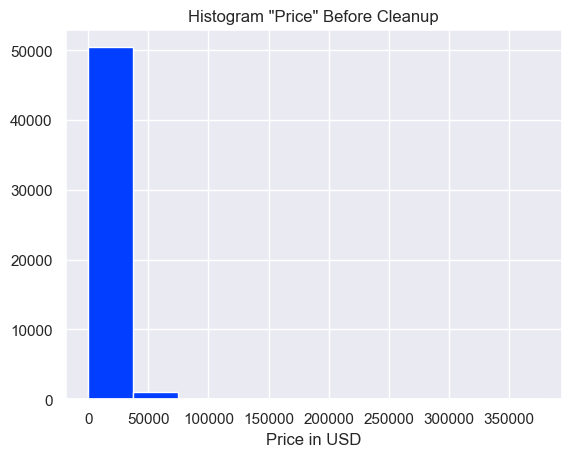

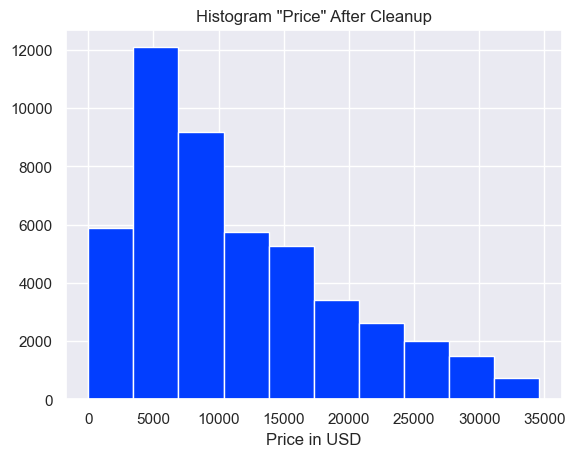

In [194]:
# comparison of 'price' columns before and after filtering out of outliers
# before cleanup
vehicle_data[['price']].hist()
plt.title('Histogram "Price" Before Cleanup')
plt.xlabel('Price in USD')

# after cleanup
clean_vehicle_data[['price']].hist()
plt.title('Histogram "Price" After Cleanup')
plt.xlabel('Price in USD')
plt.show() 

From the chart above we can see that the chart that has `outliers`, has a fairly large range of up to `USD 350000` compared to `without outliers` which is only `USD 35000`. In the data that has `outliers` the data is concentrated at the value of `USD 25000` compared to the `without outliers` data which is clearly seen at the concentration of `USD 5000`. Significant difference.

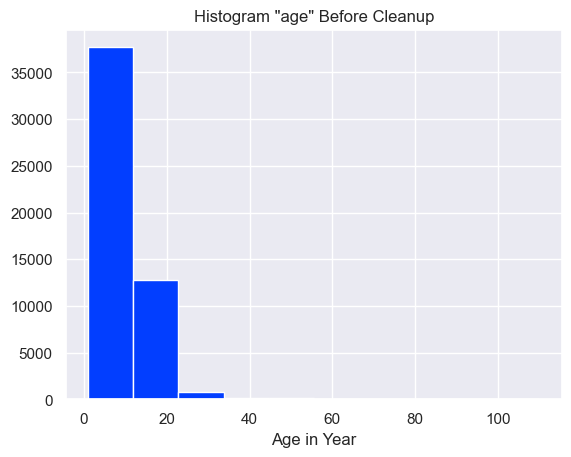

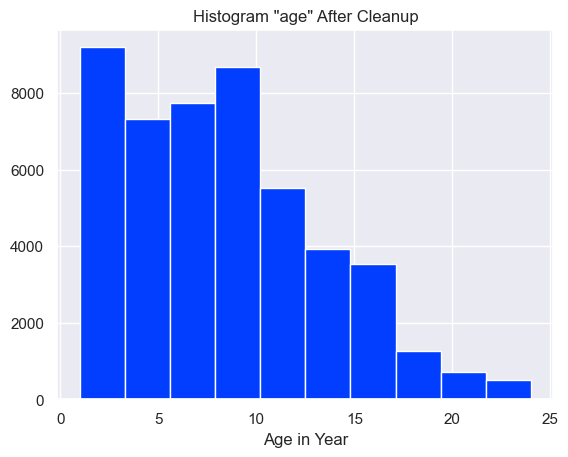

In [195]:
# comparison of 'age' column before and after filtered from outliers
# before cleanup
vehicle_data[['age']].hist()
plt.title('Histogram "age" Before Cleanup')
plt.xlabel('Age in Year')

# after cleanup
clean_vehicle_data[['age']].hist()
plt.title('Histogram "age" After Cleanup')
plt.xlabel('Age in Year')
plt.show() 

From the graph above we can see that the graph that has `outliers` has a fairly large range up to `100 Years of Age` compared to `without outliers` which is only `25 Years of Age`. In the data that has `outliers` the data is concentrated on the value `5 years old` compared to the `without outliers` data which is clearly seen to be in the concentration of `1 to 2 years old`.

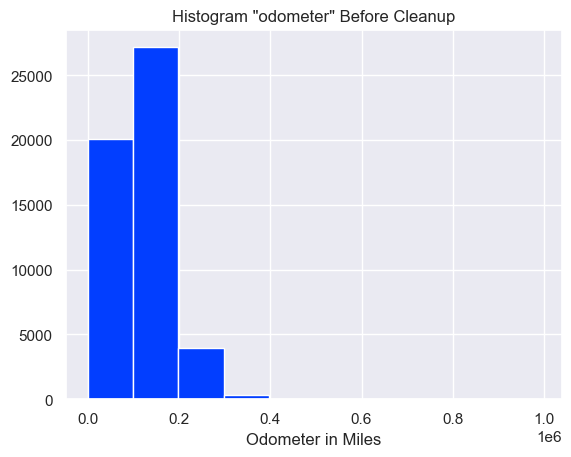

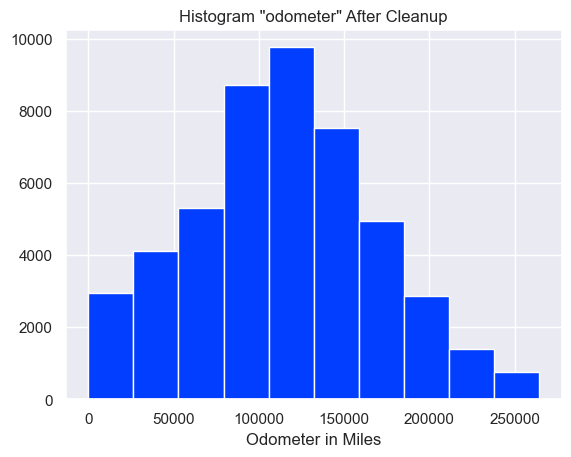

In [144]:
# comparison of the 'odometer' column before and after filtering out the outliers
# before cleanup
vehicle_data[['odometer']].hist()
plt.title('Histogram "odometer" Before Cleanup')
plt.xlabel('Odometer in Miles')

# after cleanup
clean_vehicle_data[['odometer']].hist()
plt.title('Histogram "odometer" After Cleanup')
plt.xlabel('Odometer in Miles')
plt.show() 

From the graph above we can see that the graph that has `outliers` has a fairly large range of up to `1000000 Miles` compared to `without outliers` which is only `270000 Miles`. The data that has 'outliers' is concentrated at the value '150000 Miles' compared to `without outliers` which is clearly seen at the '130000 Miles' concentration.

## Ad Validity Period <a id= 'cont_27' ></a>

Next, we will analyze the `Ad Lifespan` where we will find the average and median values and determine the generality of the length of time an ad is displayed.

### Common Average Ad Run Time <a id= 'cont_28' ></a>

In [145]:
# calculate the mean and median of 'days_listed'
print(f"Average 'days_listed'\t: {clean_vehicle_data['days_listed'].mean():.1f}")
print(f"Median 'days_listed'\t: {clean_vehicle_data['days_listed'].median()}")

Average 'days_listed'	: 39.5
Median 'days_listed'	: 33.0


We can see the value of `39 days average ad run time` and `33 days median ad run time` value. The difference between the two is quite large, so the value we will take for the calculation process is the 'median' value to get accurate results.

In [146]:
# Generality of vehicles shown in ad based on vehicle model
days_model = clean_vehicle_data.groupby('model')['days_listed'].median()
general_days = pd.Series(days_model.values)
general_days.median()

33.0

From the calculation above, we get that the average time for car advertisements to appear is 33 days.

Next, we will determine when `fast deleted time` and when `long deleted time`.

### Looking for the Shortest Runtime <a id= 'cont_29' ></a>

To calculate when the time is removed briefly where the value is less than `Quartile 1` with a formula like this:

In [147]:
# calculates the first and third quartiles for the listed power
Q1_days = clean_vehicle_data['days_listed'].quantile(0.25)
Q3_days = clean_vehicle_data['days_listed'].quantile(0.75)
limit_upper = 1.5*(Q3_days - Q1_days) + Q3_days

# search very short live time
clean_vehicle_data['too_fast'] = clean_vehicle_data['days_listed'] <= Q1_days
too_fast = clean_vehicle_data[clean_vehicle_data['too_fast'] == 1]
too_fast_stat = too_fast[['date_posted','days_listed','too_fast']]

print(f"The amount of data classified as 'too_fast' is as much: {len(too_fast_stat)}")
too_fast_stat.sort_values('days_listed',ascending=True)

The amount of data classified as 'too_fast' is as much: 12690


,date_posted,days_listed,too_fast
29377,2018-08-27,0,True
16138,2019-01-27,0,True
41940,2018-09-28,0,True
16046,2018-05-31,0,True
48843,2018-08-19,0,True
...,...,...,...
48107,2019-03-24,19,True
41046,2018-05-23,19,True
22297,2018-11-06,19,True
17112,2018-10-02,19,True


We can see that the number of ads that are classified as quickly deleted, namely `0 days to 19 days` with a total of `12690 ads`. For those with a value of `0 days` such as `2018-08-27` and those with a value of `19 days` such as `2018-06-23`.

### Looking for Oldest Runtime <a id= 'cont_30' ></a>

In [148]:
# seek very long live time
clean_vehicle_data['too_slow'] = clean_vehicle_data['days_listed'] >= Q3_days
too_slow = clean_vehicle_data[clean_vehicle_data['too_slow'] == 1]
too_slow_stat = too_slow[['date_posted','days_listed','too_slow']]

print(f"The amount of data classified as 'too_slow' is as much as: {len(too_slow_stat)}")
too_slow_stat.sort_values('days_listed',ascending=False)

The amount of data classified as 'too_slow' is as much as: 12453


,date_posted,days_listed,too_slow
4360,2018-05-24,271,True
28756,2019-01-08,267,True
2224,2019-01-24,263,True
51,2018-11-29,261,True
7875,2019-02-02,256,True
...,...,...,...
26920,2019-01-25,53,True
7792,2019-02-03,53,True
12163,2019-01-15,53,True
1817,2018-12-31,53,True


We can see that the number of ads that were relatively slow to delete was `53 days to 271 days` with a total of `12453 ads` counted. For those with a value of `53 days` such as `2018-09-21` and those with a value of `271 days` such as `2018-05-24`.

## Average Price of Each Type of Vehicle <a id= 'cont_31' ></a>

Next, we will calculate the `number of ads` and `average price` of cars based on `type` of car and choose the 2 types of cars with the most number of ads.

In [149]:
# create a pivot table for the type of vehicle against the number of ads and the average price
mean_price_vehicle = clean_vehicle_data.pivot_table(index='type',values='price',aggfunc=('count','median'))
mean_price_vehicle.columns = ['number of ads','price']

# sorting the highest number of ads by vehicle type
mean_price_vehicle.sort_values('number of ads', ascending=False)

,number of ads,price
type,,
sedan,12024,5995.0
SUV,11915,8775.0
truck,11109,14900.0
pickup,6311,13995.0
coupe,2026,12900.0
wagon,1503,7900.0
mini-van,1145,6500.0
hatchback,1007,5990.0
van,581,7800.0


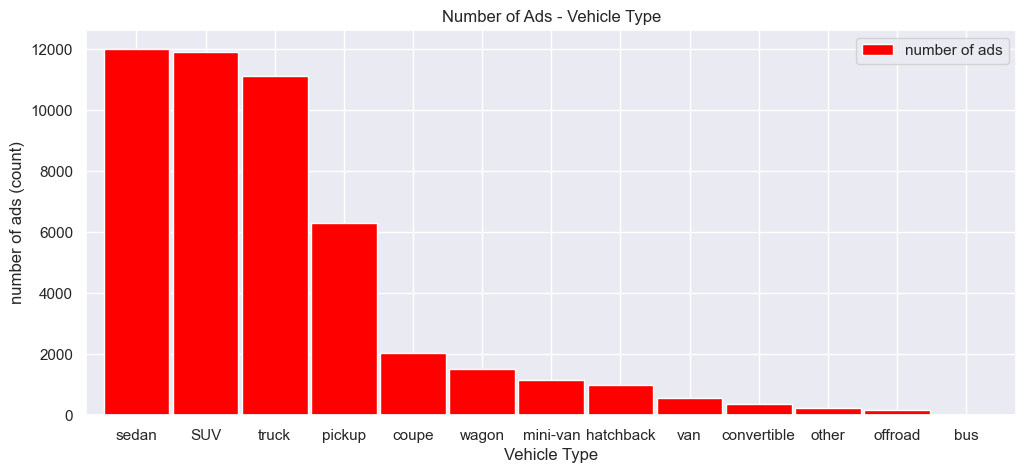

In [150]:
# ad dependency chart by vehicle type
mean_price_vehicle.sort_values('number of ads', ascending=False).plot(
    kind='bar',
    y='number of ads',
    figsize=(12,5),
    width=0.95,
    rot=0,
    color='red')

# create labels and titles
plt.title('Number of Ads - Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('number of ads (count)')

# displays graphs
plt.show()

From the analysis above, the two types of cars that have the highest number of advertisements are the `'sedan type'` and the `'SUV type'` with respectively the number of `'12024 advertisements'` and `'11915 advertisements'`.

## Price Factor <a id= 'cont_32' ></a>

Until the last stage, namely what determines the 'Car Price Factor' based on the data we receive. We will learn from the two types of vehicles that have the most advertisements, namely the 'sedan type' and the 'SUV type'. We will analyze using `correlation plot graph` for `numeric` data, `boxplot` graph for `categorical` data and `correlation matrix`.

First, we filter the data for each vehicle as follows:

In [151]:
# filter data for sedan cars
sedan_data = clean_vehicle_data.query('type == "sedan"')
sedan_data = sedan_data[['price','age','odometer','condition','transmission','paint_color']]

# filter data for suv cars
suv_data = clean_vehicle_data.query('type == "SUV"')
suv_data = suv_data[['price','age','odometer','condition','transmission','paint_color']]

Next we will create a `correlation graph` for `numeric` data (price, age, condition, odometer) and a `boxplot graph` for `categorical` data (transmission and color). The categorical data displayed is categorical with more than 50 ads.

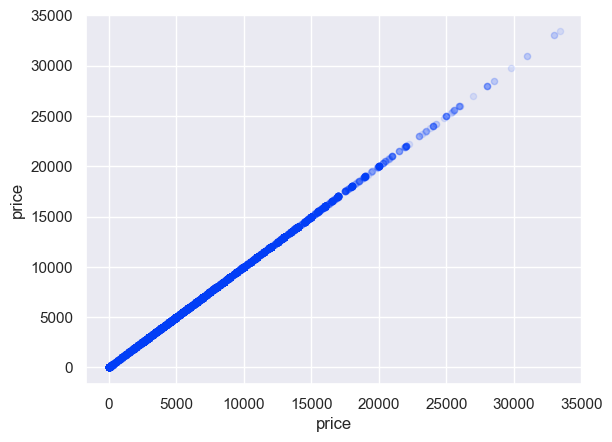

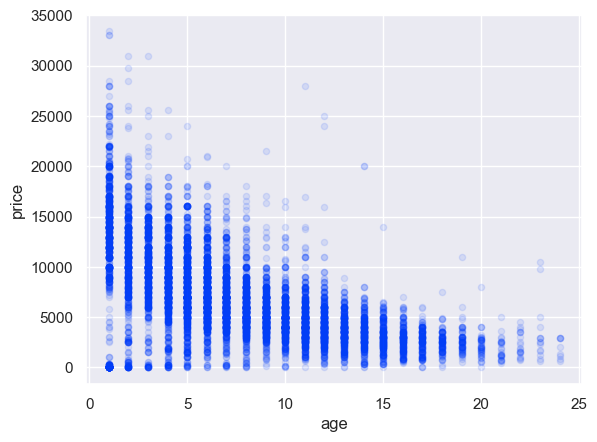

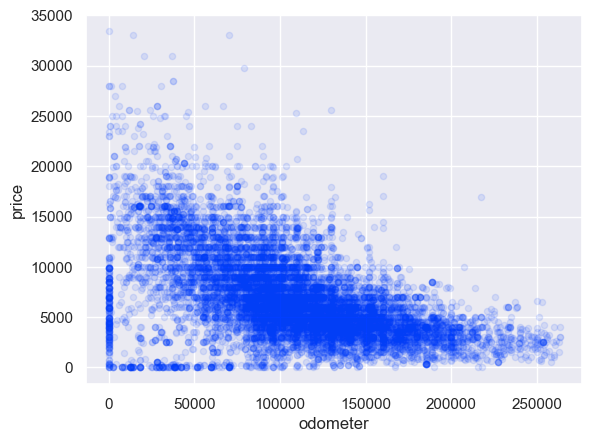

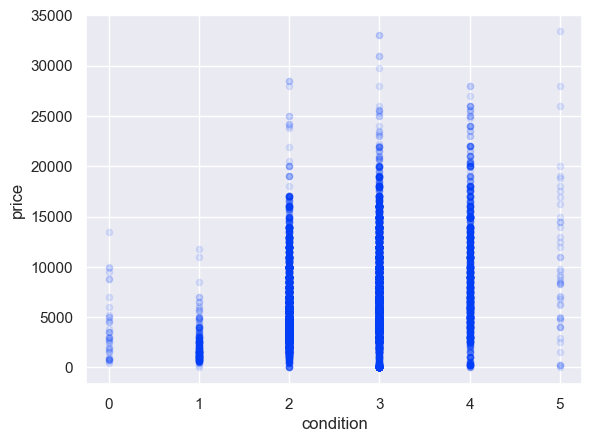

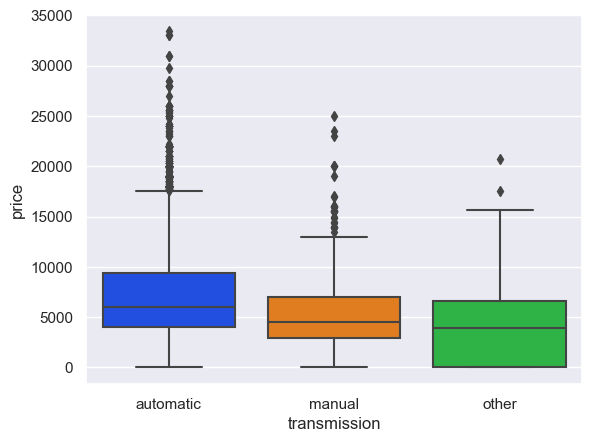

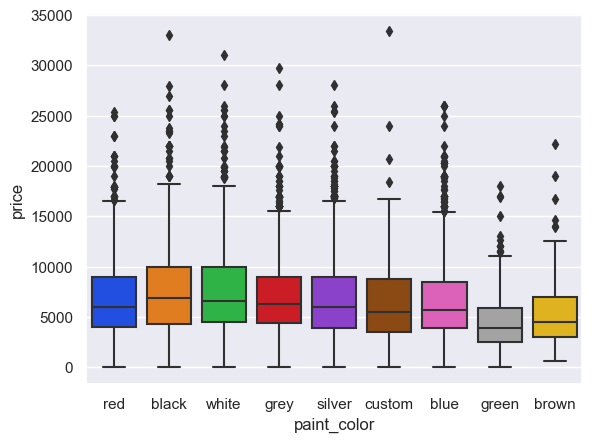

In [152]:
# create a correlation graph for sedans
for col in sedan_data.columns:
    # category conditioning
    if col == 'transmission':
        # create a filtered data collection dataframe
        filter_sedan_transmission = pd.DataFrame()
        for unik_t_sedan in sedan_data['transmission'].unique():
            # calculates categorical data with at least 50 ads
            if sedan_data.query('transmission == @unik_t_sedan')['transmission'].count() >= 50:
                # filter categorical data
                sedan_transmission = sedan_data.query('transmission == @unik_t_sedan')
                # Merge data to a pool dataframe
                filter_sedan_transmission = pd.concat([filter_sedan_transmission,sedan_transmission]).reset_index(drop=True)
        # create a boxplot graph
        sns.boxplot(data=filter_sedan_transmission,x=col,y='price')
        plt.show()
    # category conditioning
    elif col == 'paint_color':
        # create a filtered data collection dataframe
        filter_sedan_color = pd.DataFrame()
        for unik_c_sedan in sedan_data['paint_color'].unique():
            # calculates categorical data with at least 50 ads
            if sedan_data.query('paint_color == @unik_c_sedan')['paint_color'].count() >= 50:
                # filter categorical data
                sedan_color = sedan_data.query('paint_color == @unik_c_sedan')
                # Merge data to a pool dataframe
                filter_sedan_color = pd.concat([filter_sedan_color,sedan_color]).reset_index(drop=True)
        # create a boxplot graph
        sns.boxplot(data=filter_sedan_color,x=col,y='price')
        plt.show()
    else:
        # create a scatter graph for numeric data
        sedan_data.plot(kind="scatter",x=col,y='price',alpha=0.1)
        plt.show()

From the `correlation graph` of the sedan car above, it can be seen that there is a fairly strong correlation between `price` with `age` and `price` with `age`, but a weak correlation between `price` with `condition`.

As for the 'boxplot graph' of the sedan above, it can be seen that for the 'transmission' category, the 'automatic' type has the highest average price compared to other types of transmission. As for the `color` category, `black` has the highest average price compared to other color types.

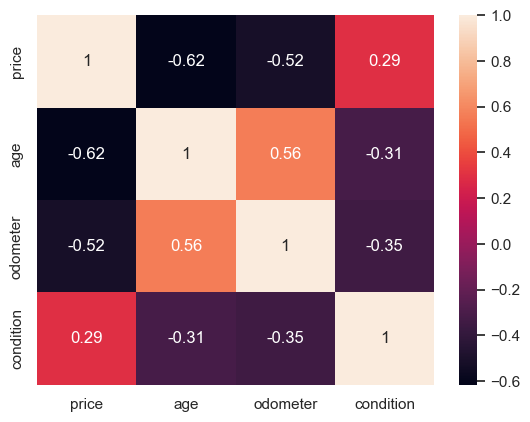

In [153]:
# create a price correlation table for sedan cars
corr = sedan_data[['price','age','odometer','condition']].corr()
sns.heatmap(corr,annot=True)
plt.show()

From the correlation table for `sedan car` it is evident that the `quite strong` correlation between `price` with `age` and `price` with `odometer` have a negative correlation. This means that the higher the `Selling Price`, the lower the `Age` and `Odometer` of the sedan. The correlation is weak between `price` with `condition` so that it does not have a significant effect on the `Selling Price` of sedan cars.

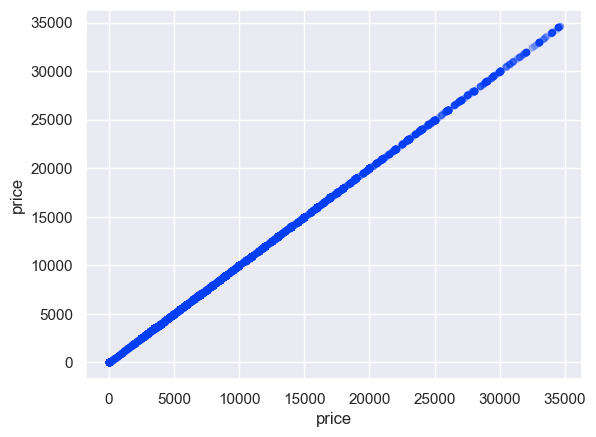

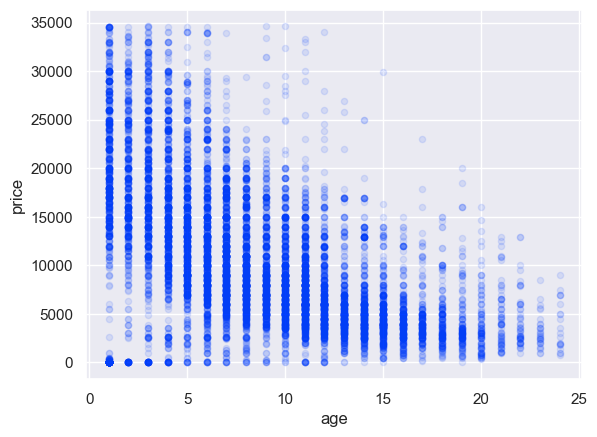

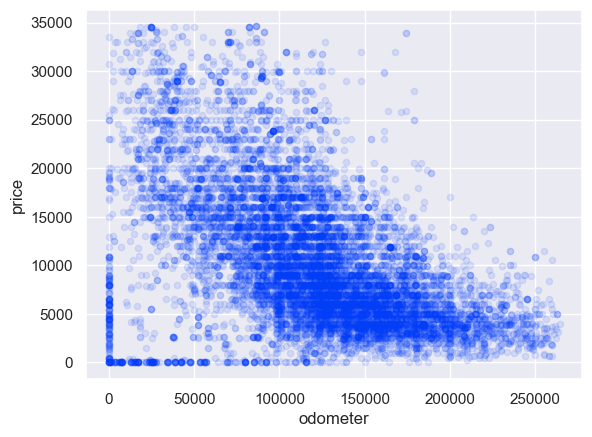

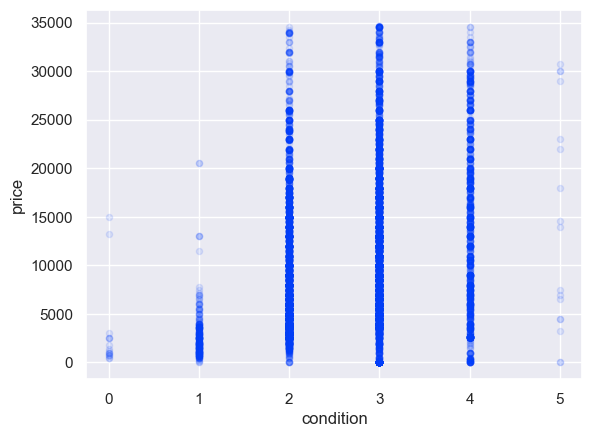

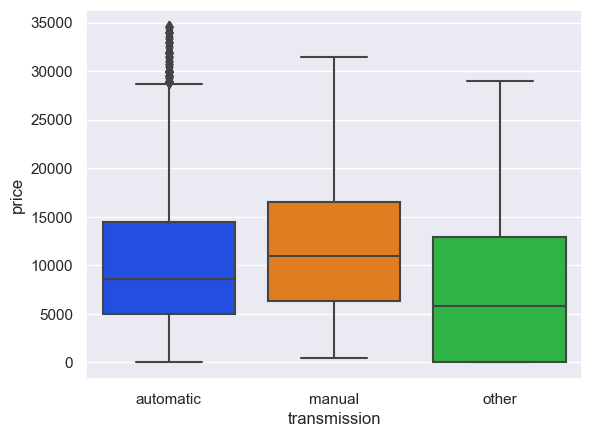

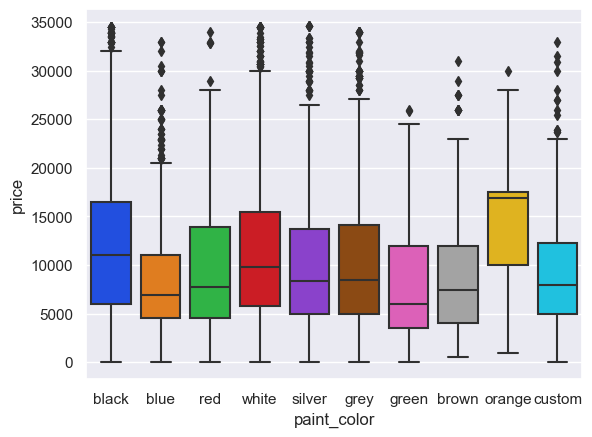

In [154]:
# Create a correlation graph for SUV cars
for col in suv_data.columns:
    # category conditioning
    if col == 'transmission':
        # create a filtered data collection dataframe
        filter_suv_transmission = pd.DataFrame()
        for unik_t_suv in suv_data['transmission'].unique():
            # calculates categorical data with at least 50 ads
            if suv_data.query('transmission == @unik_t_suv')['transmission'].count() >= 50:
                # filter categorical data
                suv_transmission = suv_data.query('transmission == @unik_t_suv')
                # Merge data to a pool dataframe
                filter_suv_transmission = pd.concat([filter_suv_transmission,suv_transmission]).reset_index(drop=True)
        # create a boxplot graph
        sns.boxplot(data=filter_suv_transmission,x=col,y='price')
        plt.show()
    # category conditioning
    elif col == 'paint_color':
        # create a filtered data collection dataframe
        filter_suv_color = pd.DataFrame()
        for unik_c_suv in suv_data['paint_color'].unique():
            # calculates categorical data with at least 50 ads
            if suv_data.query('paint_color == @unik_c_suv')['paint_color'].count() >= 50:
                # filter categorical data
                suv_color = suv_data.query('paint_color == @unik_c_suv')
                # Merge data to a pool dataframe
                filter_suv_color = pd.concat([filter_suv_color,suv_color]).reset_index(drop=True)
        # create a boxplot graph
        sns.boxplot(data=filter_suv_color,x=col,y='price')
        plt.show()
    else:
        # create a scatter graph for numeric data
        suv_data.plot(kind="scatter",x=col,y='price',alpha=0.1)
        plt.show()

From the `correlation graph` of the SUV car above, it can be seen that there is a fairly strong correlation between `price` with `age`, but a weak correlation between `price` with `age` and `price` with `condition`.

As for the 'boxplot graph' for the SUV car above, it can be seen that for the 'transmission' category, the 'manual' type has the highest average price compared to other types of transmission. As for the `color` category, `orange` has the highest average price compared to other color types.

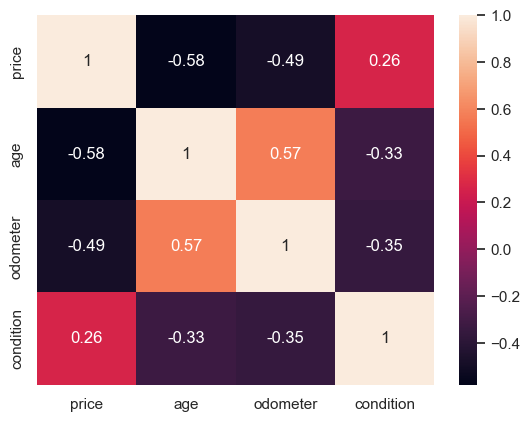

In [155]:
# create a price correlation table for sedan cars
corr = suv_data[['price','age','odometer','condition']].corr()
sns.heatmap(corr,annot=True)
plt.show()

From the correlation table for `SUV` it is evident that the `quite strong` correlation between `price` with `age` has a negative correlation. This means that the higher the 'Selling Price', the lower the 'Age' of the SUV. The correlation are weak between `price` with `odometer` and `price` with `condition` so that they don't have a significant effect on the `Selling Price` of SUV cars.

## General Conclusion <a id= 'cont_33' ></a>

Analysis of the factors that affect the selling price of a car begins with checking the data sources including 'checking the sample', 'checking for missing values', and 'checking the data type'. the data source has missing values including the `model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd` columns. Further corrections are made to fill in the missing values.

Next is the improvement of data types for several columns including the `model_year`, `cylinders`, `odometer`, `is_4wd`, and `date_posted` columns using the appropriate data type. Finally, checking for duplicate data was carried out.

Then create several additional columns to facilitate analysis including columns to separate `date_posted` into `day`, `year`, `month`, and `date`. And some other columns namely `age` and `avg_odo`.

Next is checking outliers and their handling as follows:
1. Selection of parameters for analysis using `boxplot`. here we take several parameters that affect the `'price'`, namely `'age'`, `'odometer'`, `'cylinders'`, `'condition'`.
2. several parameters have very many outliers including `'age'`, `'odometer'`, `'cylinders'`.
3. Then filter the data by removing all the outliers mentioned in step 2.
4. Comparison of data before filtering and after filtering using `histogram`. The outliers affect the distribution of the data. By getting rid of it the data is well distributed.

After correcting the data and getting rid of outliers, the next step is to analyze and conclude in the following summary:
- The average `price` of all cars is `USD 5000`
- The average `age` of all cars sold is `1 to 2 years old`
- The average `mileage` of vehicles sold is at `130000 Miles`
- The average common run time of `days_listed` car ads is at `33 days`
- The shortest time the `too_fast` ad was displayed was `0 days` as on `2018-08-27`.
- The longest time the ad was running `too_slow` was `271 days` as on `2018-05-24`.
- The vehicles with the most number of ads are the `sedan` and `SUV` types
- Numerical data correlation for `sedan` type vehicles has a strong relationship between `price` with `age` and `price` with `condition` which have a negative correlation. Meanwhile, categorical data for `transmission` has a high selling price for `automatic`, categorical for `color` has a high selling price for `black`
- Correlation of numerical data for vehicle type `SUV` has a strong relationship between `price` with `age` which has a negative correlation. Meanwhile, categorical data for `transmission` has a high selling price for `manual`, and `color` categorical has a high selling price for `orange`